# Electric Fields - All About

The only differences between electric and magnetic fields in OSCARS are the units and how it is used in the trajectory calculation.  This file is essentially a search and replace bfield->efield of the All About Magnetic Fields file.

This is all about the types of electric fields that are available in OSCARS.  This includes:

* Uniform fields
* Gaussian fields
* Undulator Fields
* Importing field data from files
* Python function for magnetic field
* Combining different fields

You can also rotate and translate any field easily as is shown in several of the examples.

There are several ways to import field data.  For 2D and 3D grids the grid must be regular.  For 1D spatial data you may import non-equidistant points.

In [2]:
# matplotlib plots inline
%matplotlib inline

# Import the OSCARS SR module
import oscars.sr

# Import OSCARS plots (matplotlib)
from oscars.plots_mpl import *

OSCARS v1.31.05 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


In [3]:
# Create a new OSCARS SR object
osr = oscars.sr.sr()

## Uniform Field

A uniform field can be specified for all space or in a given *width*.  The *width* input list is like a vector representing the length and direction of the field.  It will be centered at [0, 0, 0] unless translated

add_efield_uniform can be thought of as a box where *width* are the dimensions.  If any dimension is 0 it is infinite in that dimension.

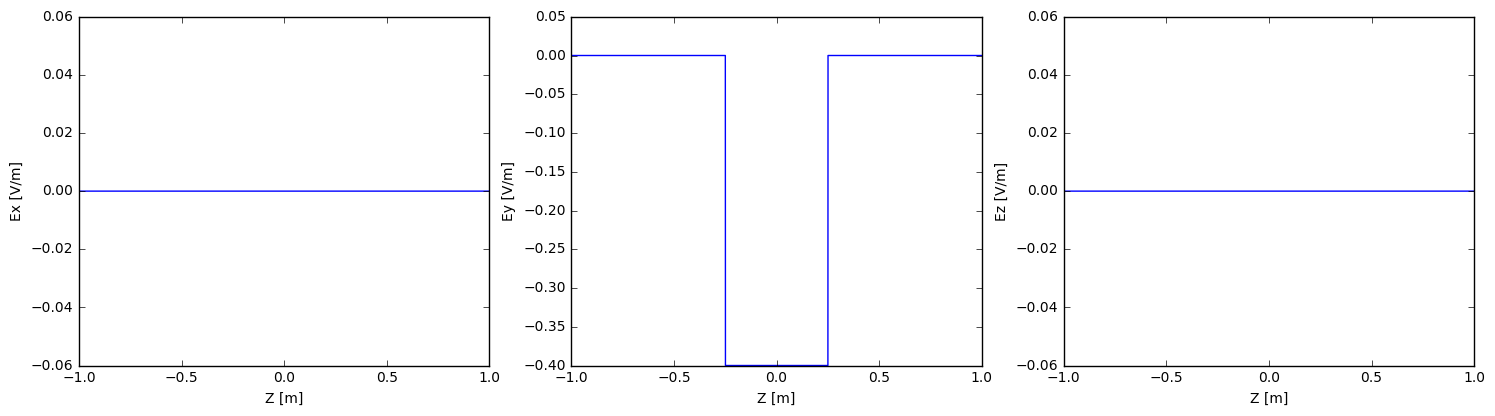

In [4]:
# Clear any previous fields and add a constant magnetic field of 0.4 [T]
# in the negative Y-direction with a length of 1m in the Z-direction
osr.clear_efields()
osr.add_efield_uniform(efield=[0, -0.4, 0], width=[0, 0, 0.5])

# Plot the field if you like
plot_efield(osr)

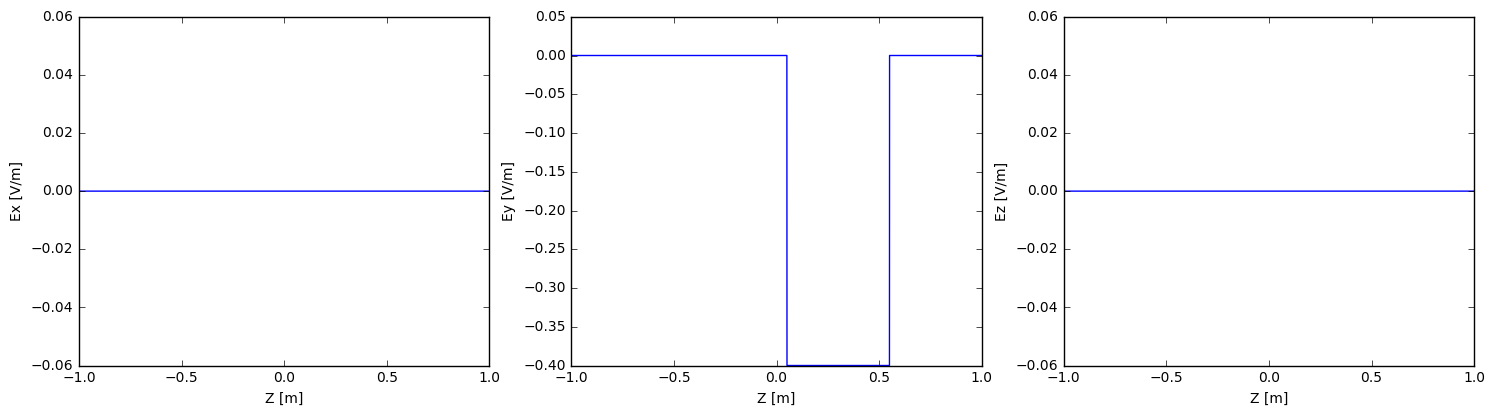

In [5]:
# The same field as above, but translated in space
osr.clear_efields()
osr.add_efield_uniform(efield=[0, -0.4, 0], width=[0, 0, 0.5], translation=[0, 0, 0.3])

# Plot the field if you like
plot_efield(osr)

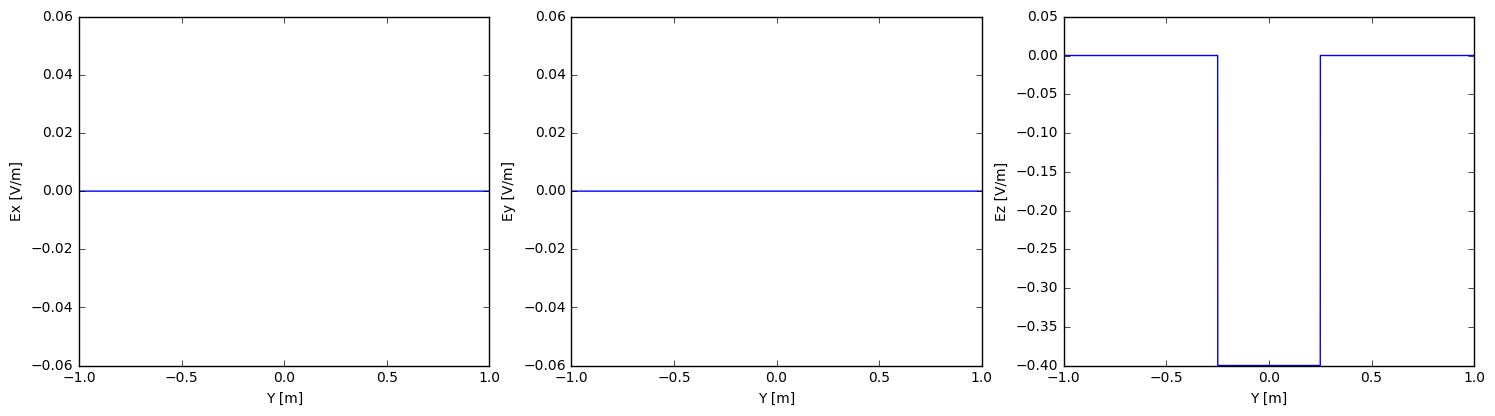

In [6]:
# The same field as above, but on a different axis
osr.clear_efields()
osr.add_efield_uniform(efield=[0, 0, -0.4], width=[0, 0.5, 0])

# Plot the field if you like
plot_efield(osr, axis='Y')

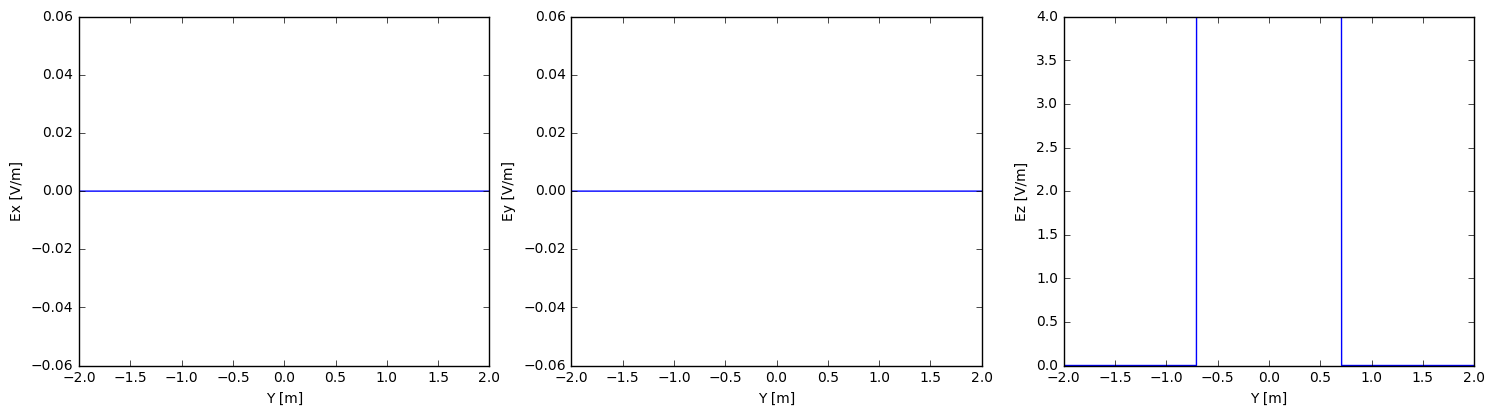

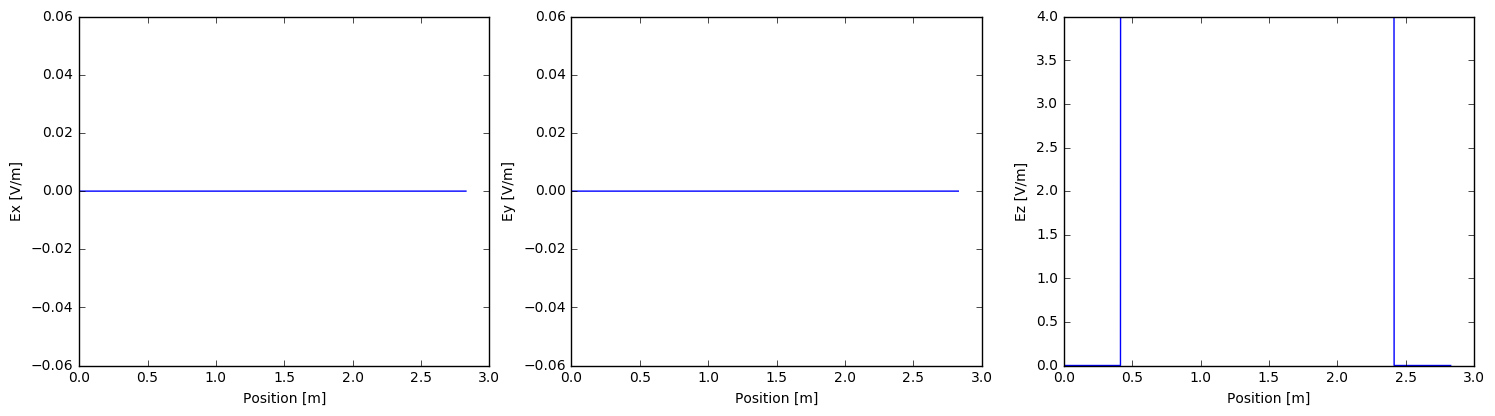

In [7]:
# You can also rotate the field and plot it as a function of a line through any two points
osr.clear_efields()
osr.add_efield_uniform(efield=[0, 0, 4], width=[1, 2, 1], rotations=[0, 0, osr.pi()/4])

# Plot the field if you like
plot_efield(osr, -2, 2, axis='Y')
plot_efield(osr, between_two_points=[[-1, -1, 0], [1, 1, 0]])

## Gaussian Field

This is a gaussian field in 3D.  One can specify the 'sigma' in 1 2, or 3 dimensions

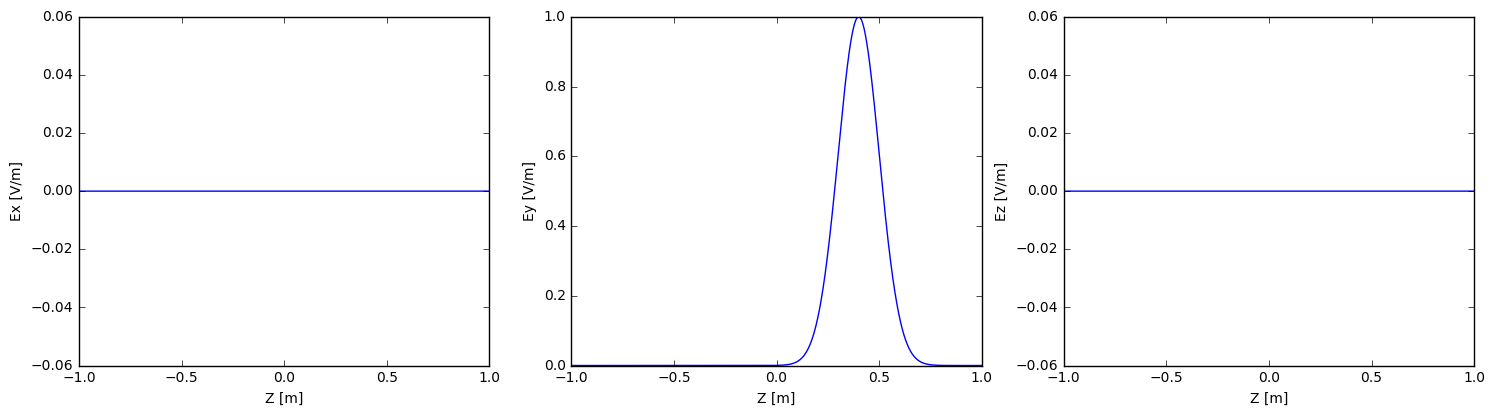

In [8]:
# This is a gaussian with one dimension specified.
osr.clear_efields()
osr.add_efield_gaussian(efield=[0, 1, 0], sigma=[0, 0, 0.1], translation=[0, 0, 0.2])

# Plot the field if you like
plot_efield(osr)

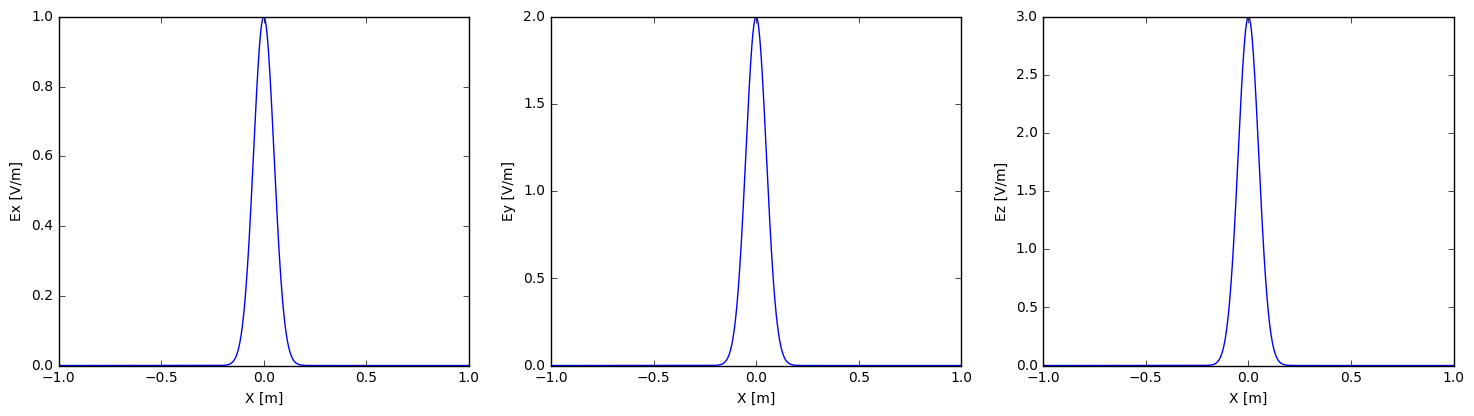

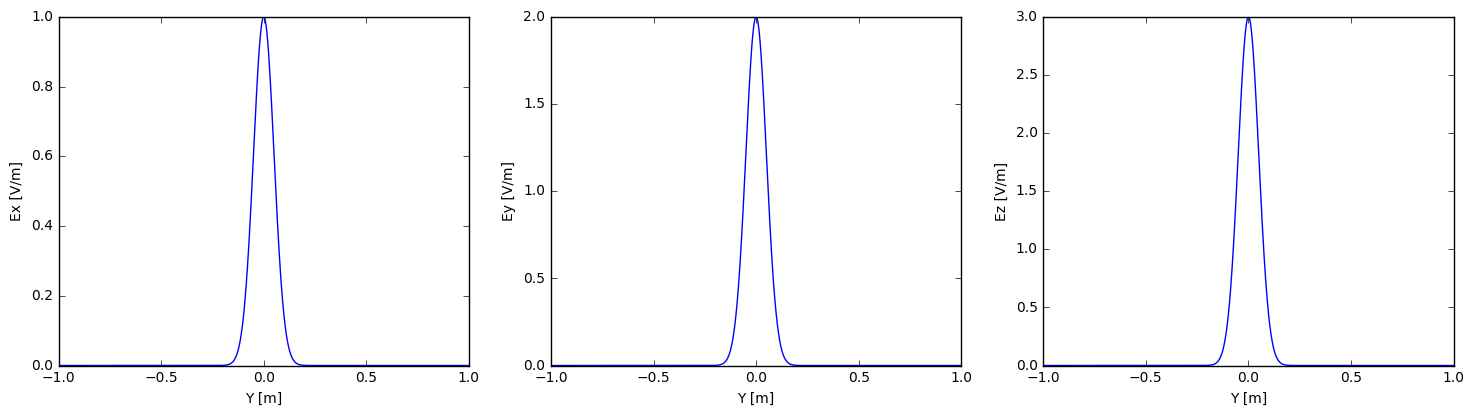

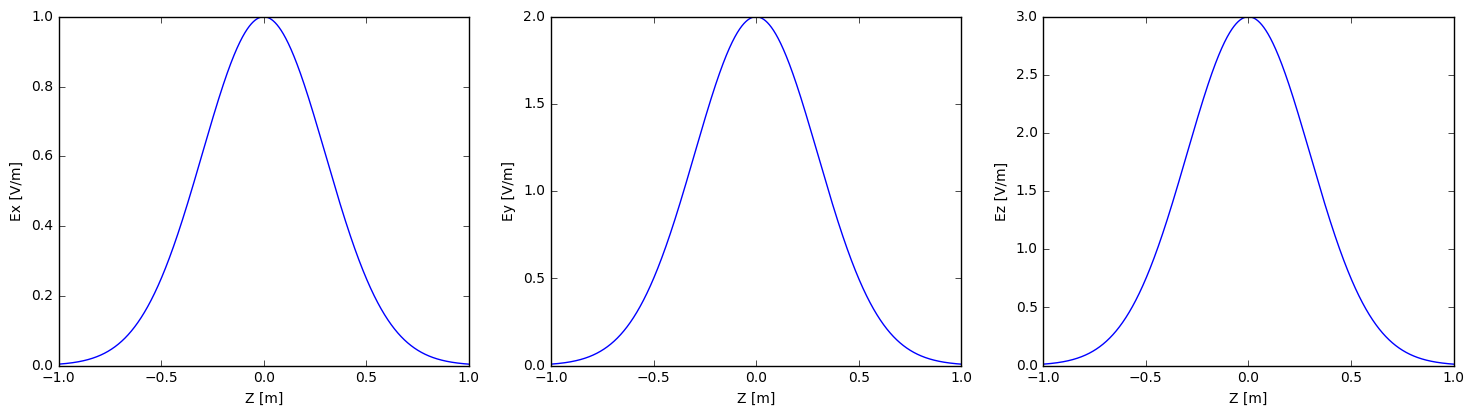

In [9]:
# This is a gaussian with 3 dimensions specified
osr.clear_efields()
osr.add_efield_gaussian(efield=[1, 2, 3], sigma=[0.05, 0.05, 0.3])

# Plot the field if you like
plot_efield(osr, axis='X')
plot_efield(osr, axis='Y')
plot_efield(osr, axis='Z')

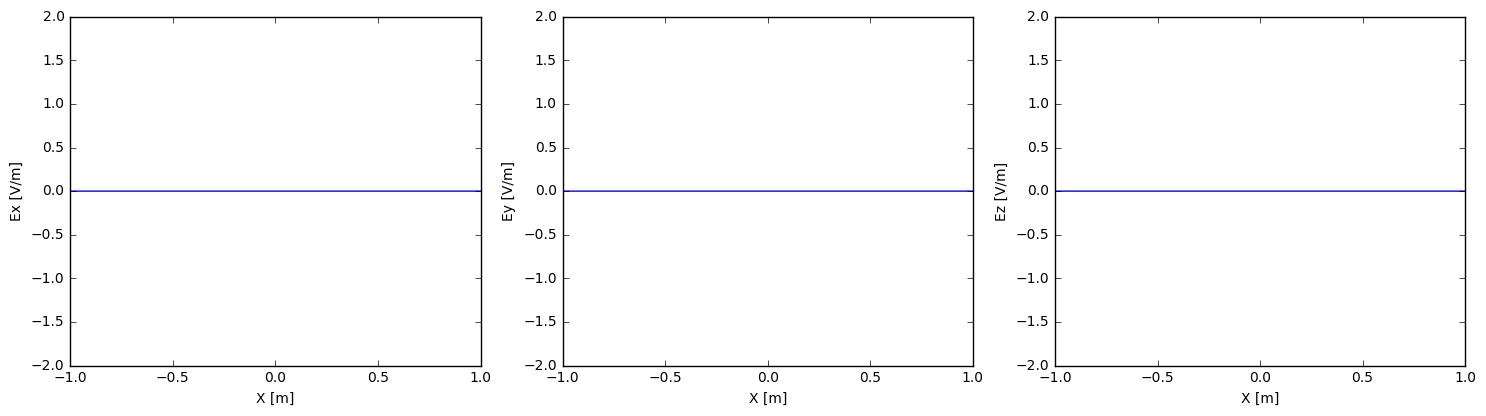

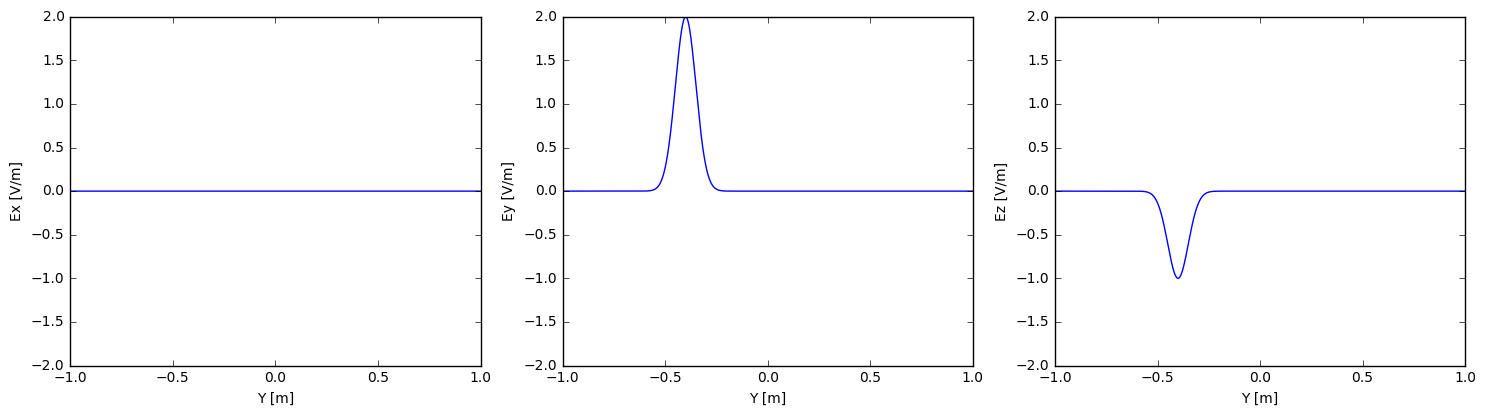

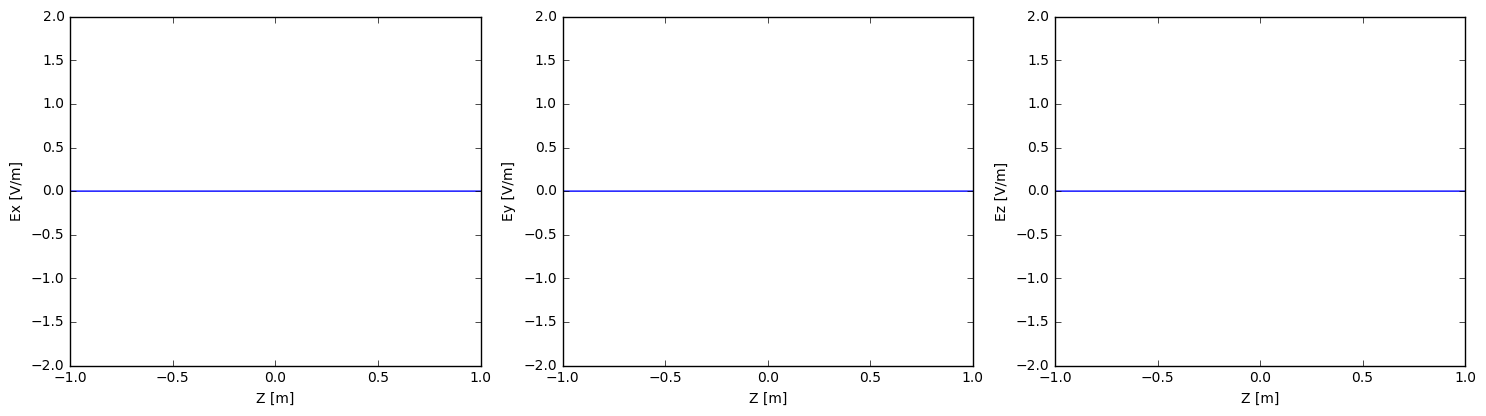

In [10]:
# One can also rotate and translate the gaussian object
osr.clear_efields()
osr.add_efield_gaussian(efield=[1, 2, 0], sigma=[0.05, 0.05, 0.3], rotations=[0, osr.pi()/2, 0], translation=[0, -0.2, 0])

# Plot the field if you like
plot_efield(osr, axis='X', ylim=[-2, 2])
plot_efield(osr, axis='Y', ylim=[-2, 2])
plot_efield(osr, axis='Z', ylim=[-2, 2])

## Undulator Field

It is simple to create a basic undulator field with termination using 'add_undulator'.  You must specify the period (given as a vector), the number of periods, and the peak efield

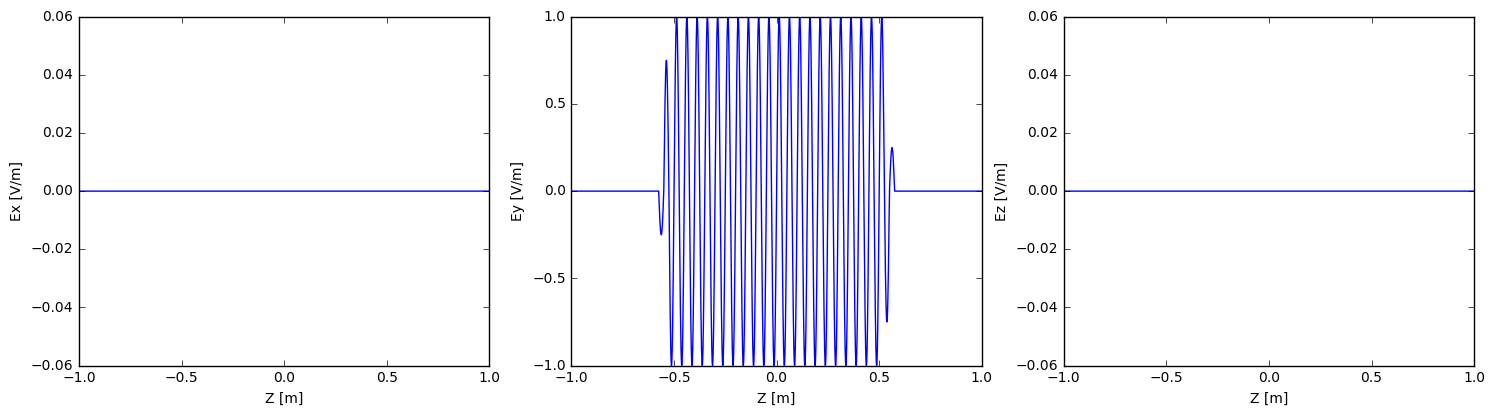

In [11]:
# This is the basic planer undulator field
osr.clear_efields()
osr.add_efield_undulator(efield=[0, 1, 0], period=[0, 0, 0.050], nperiods=21)

# Plot the field if you like
plot_efield(osr, -1, 1, axis='Z')

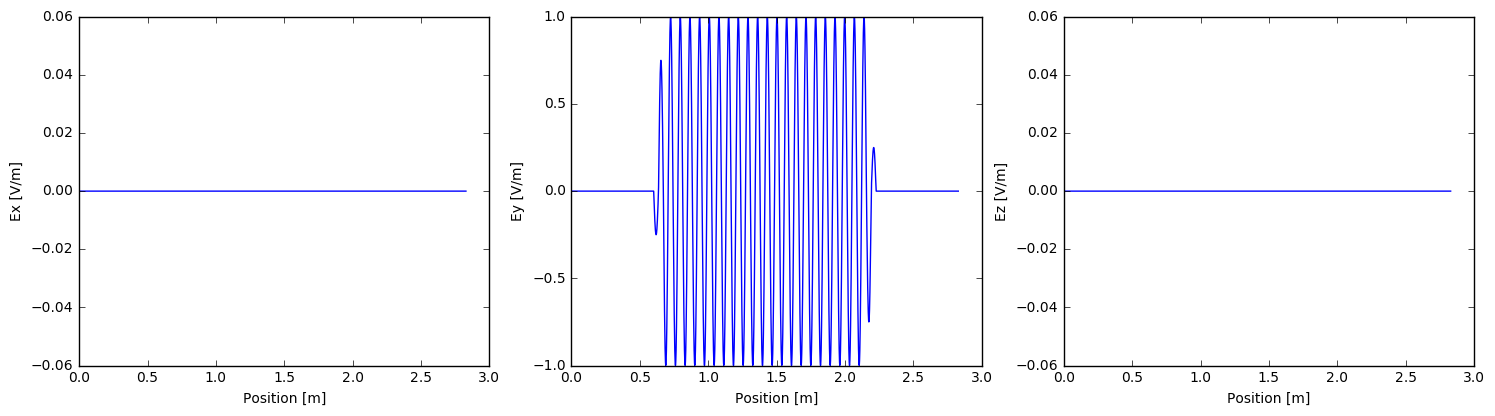

In [12]:
# This is the basic planer undulator field where the axis is in an arbitrary direction
osr.clear_efields()
osr.add_efield_undulator(efield=[0, 1, 0], period=[0.050, 0, 0.050], nperiods=21)

# Plot the field if you like
plot_efield(osr, between_two_points=[[-1, 0, -1], [1, 0, 1]])

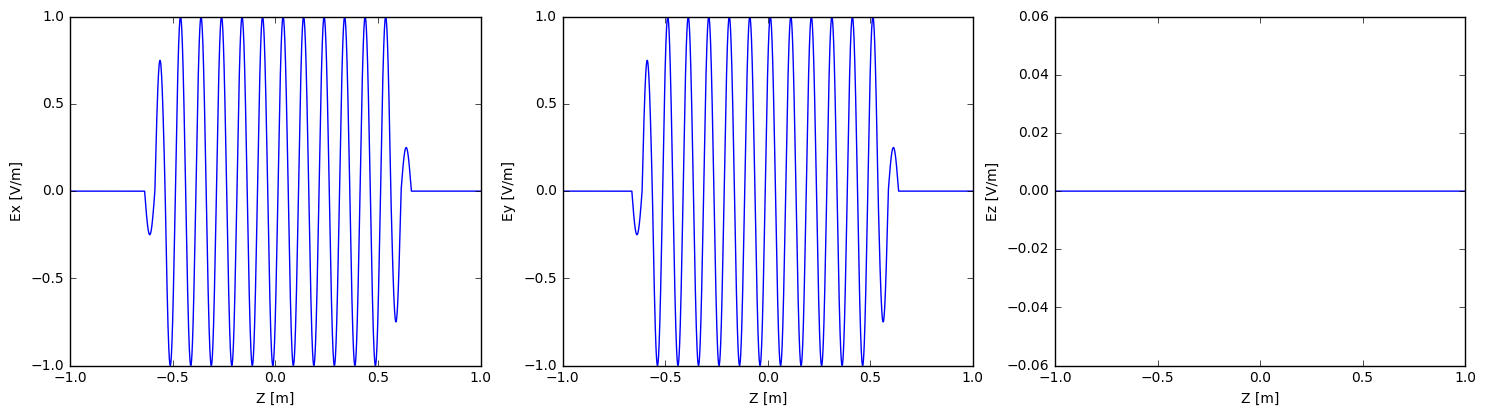

In [13]:
# This is the field of an EPU.  Simply add two undulator fields offset in phase
osr.clear_efields()
osr.add_efield_undulator(efield=[0, 1, 0], period=[0, 0, 0.100], nperiods=11, phase=-osr.pi()/4)
osr.add_efield_undulator(efield=[1, 0, 0], period=[0, 0, 0.100], nperiods=11, phase=+osr.pi()/4)

# Plot the field if you like
plot_efield(osr)

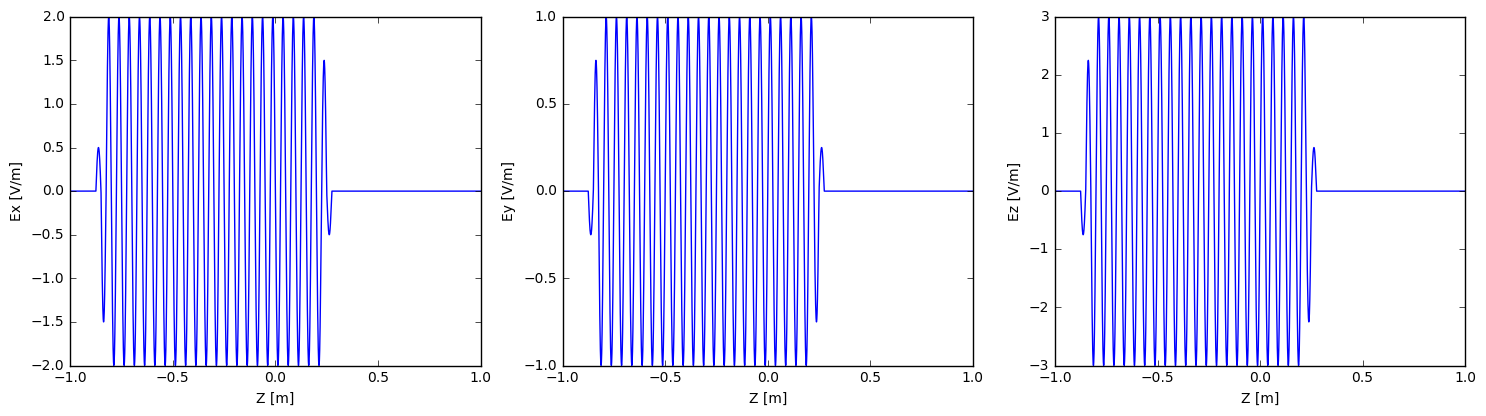

In [14]:
# One can also rotat and translate an undulator field
osr.clear_efields()
osr.add_efield_undulator(efield=[1, 2, 3], period=[0, 0, 0.050], nperiods=21, rotations=[0, 0, osr.pi()/2.], translation=[0, 0, -0.3])

# Plot the field if you like
plot_efield(osr)

## Importing Data

OSCARS supports several basic data formats for importing.  We are interested in supporting more.

One basic format is where you have the magnetic field (1, 2, or 3D) given as a function of position and your file format lists rows of (for instance) 'Z Bx By Bz'.  In this case, specify X, Y, or Z, and whichever of the B's you have in the format field: iformat='Z Bx By Bz'.

OSCARS format:
Has 10 lines of header information, followed by lines consisting of 'Bx By Bz'.  You must specify iformat='OSCARS'.  The header is as follows:
* Comment line
* Initial X position
* Step size in X
* Number of points in X
* Initial Y position
* Step size in Y
* Number of points in Y
* Initial Z position
* Step size in Z
* Number of points in Z

OSCARS also supports iformat='SPECTRA' and iformat='SRW'

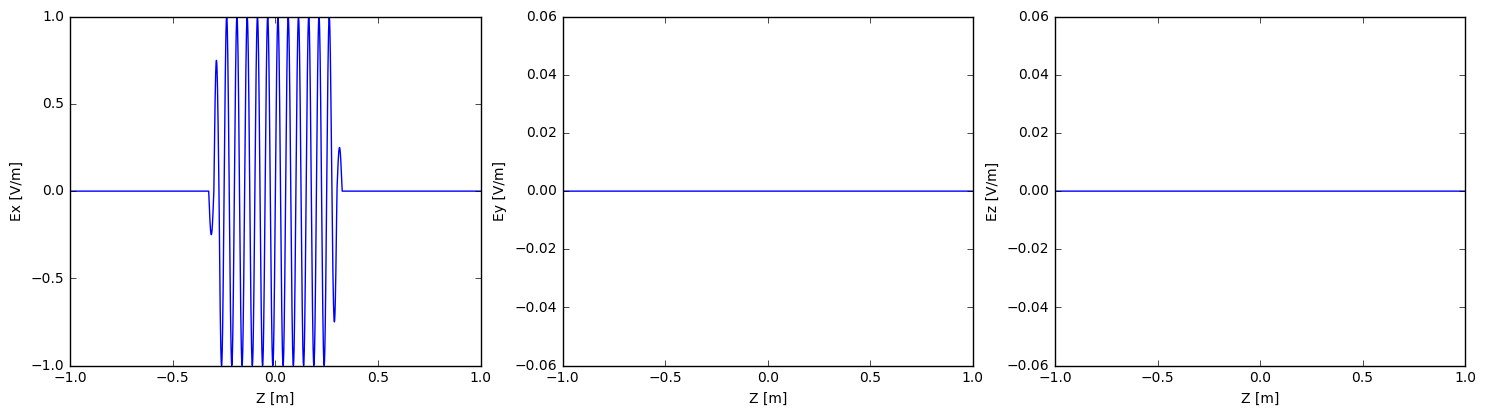

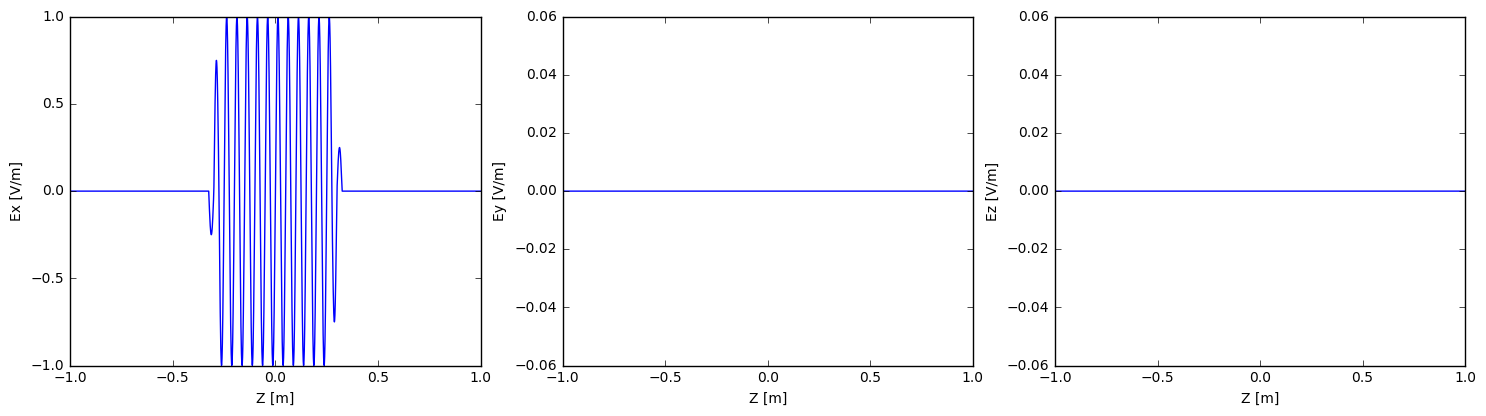

In [16]:
# To illustrate the basic 3D format let's create a data file, then import it.
# It will be plotted before and after the import

# Create an undulator field
osr.clear_efields()
osr.add_efield_undulator(efield=[1, 0, 0], period=[0, 0, 0.050], nperiods=11)
plot_efield(osr, -1, 1, axis='Z')

# Now write the field to a file
osr.write_efield(ofile='AAElectricFields_OSCARS.dat', oformat='OSCARS', xlim=[-1, 1], nx=2, ylim=[-1, 1], ny=2, zlim=[-1, 1], nz=5000)
   

# Clear fields and import the field from the file created above
osr.clear_efields()
osr.add_efield_file(ifile='AAElectricFields_OSCARS.dat', iformat='OSCARS')

plot_efield(osr, -1, 1, axis='Z')

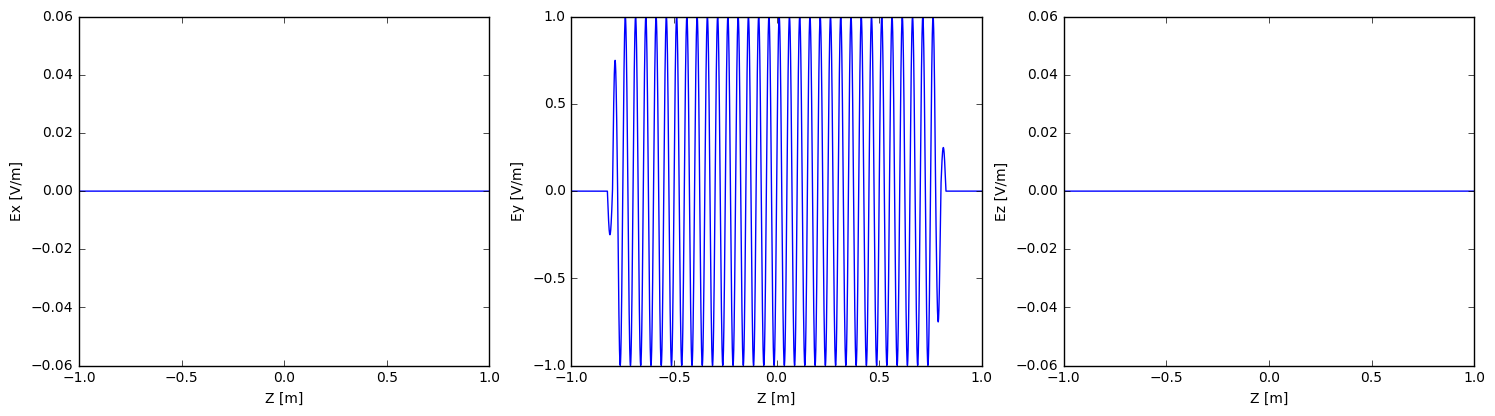

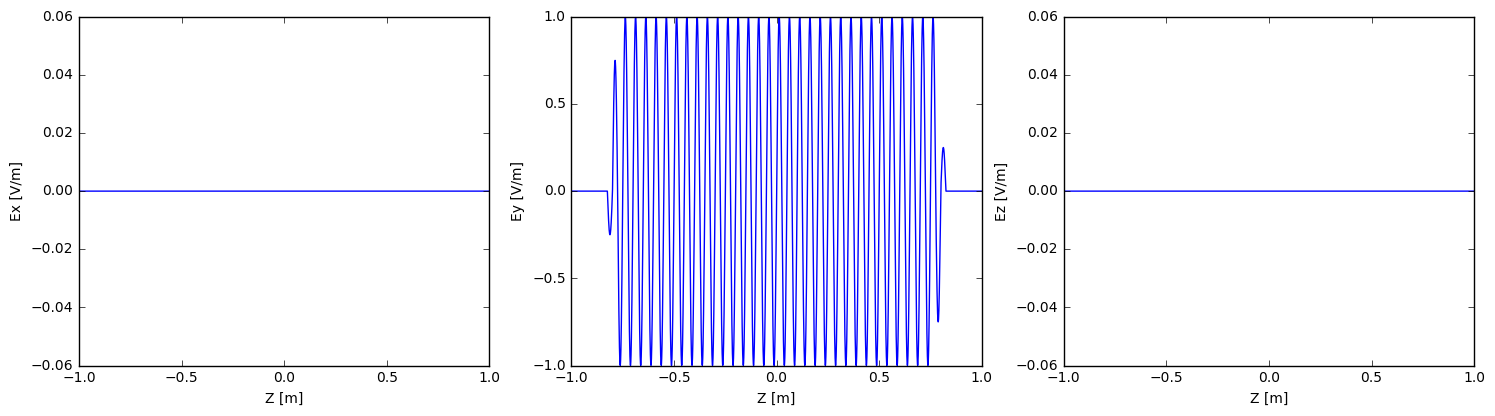

In [17]:
# To illustrate the basic 1D format let's create a data file, then import it.
# It will be plotted before and after the import

# Create an undulator field
osr.clear_efields()
osr.add_efield_undulator(efield=[0, 1, 0], period=[0, 0, 0.05], nperiods=31)
plot_efield(osr, -1, 1, axis='Z')

# Now write the field to a file
osr.write_efield(ofile='AAElectricFields_OSCARS1D.dat', oformat='OSCARS1D Z By Bx Bz', zlim=[-1, 1], nz=5000)   

# Clear fields and import the field from the file created above, additionally you can scale the input
osr.clear_efields()
osr.add_efield_file(ifile='AAElectricFields_OSCARS1D.dat', iformat='OSCARS1D Z By Bx Bz', scale=[1, 0.1])

plot_efield(osr, -1, 1, axis='Z')

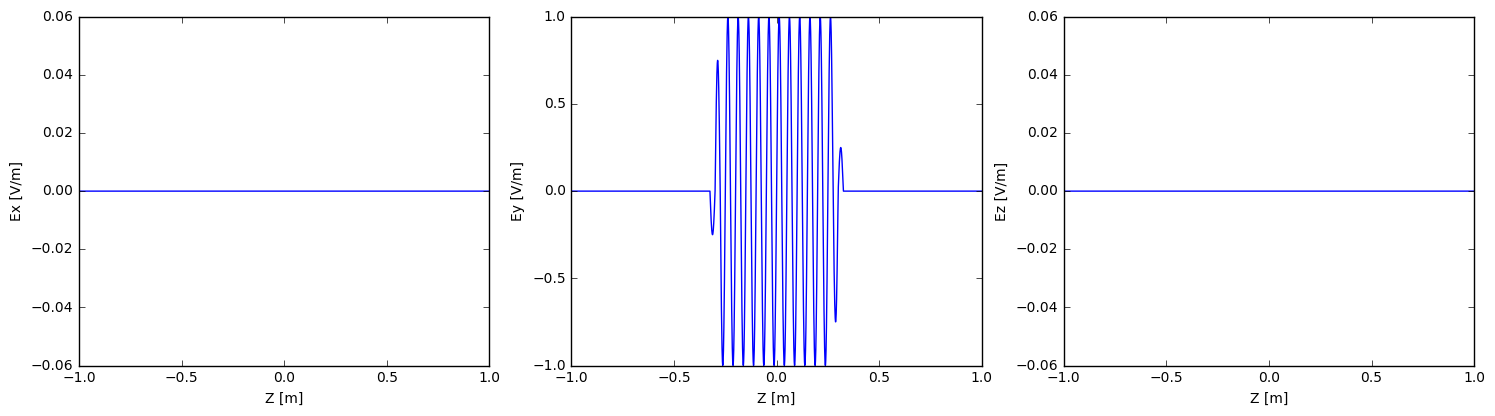

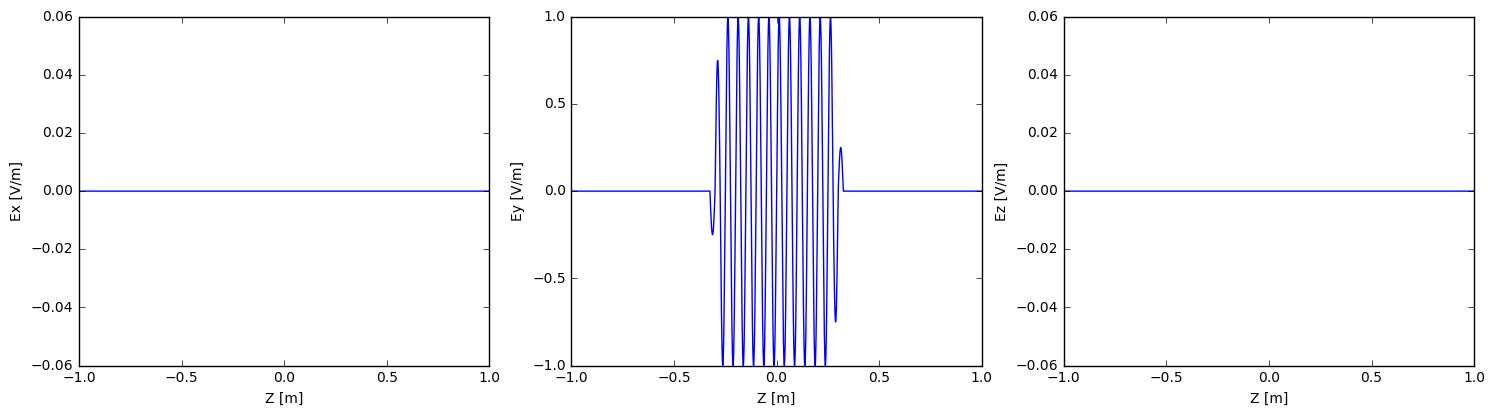

In [18]:
# OSCARS supports import and exporting the SPECTRA format.
# It will be plotted before and after the import

# Make an undulator field
osr.clear_efields()
osr.add_efield_undulator(efield=[0, 1, 0], period=[0, 0, 0.050], nperiods=11)
plot_efield(osr)

# Now write the field to a file
osr.write_efield(ofile='AAElectricFields_SPECTRA.dat', oformat='SPECTRA', xlim=[-1, 1], nx=2, ylim=[-1, 1], ny=2, zlim=[-1, 1], nz=5000)

# Clear fields and import the field from the file created above
osr.clear_efields()
osr.add_efield_file(ifile='AAElectricFields_SPECTRA.dat', iformat='SPECTRA')

plot_efield(osr)

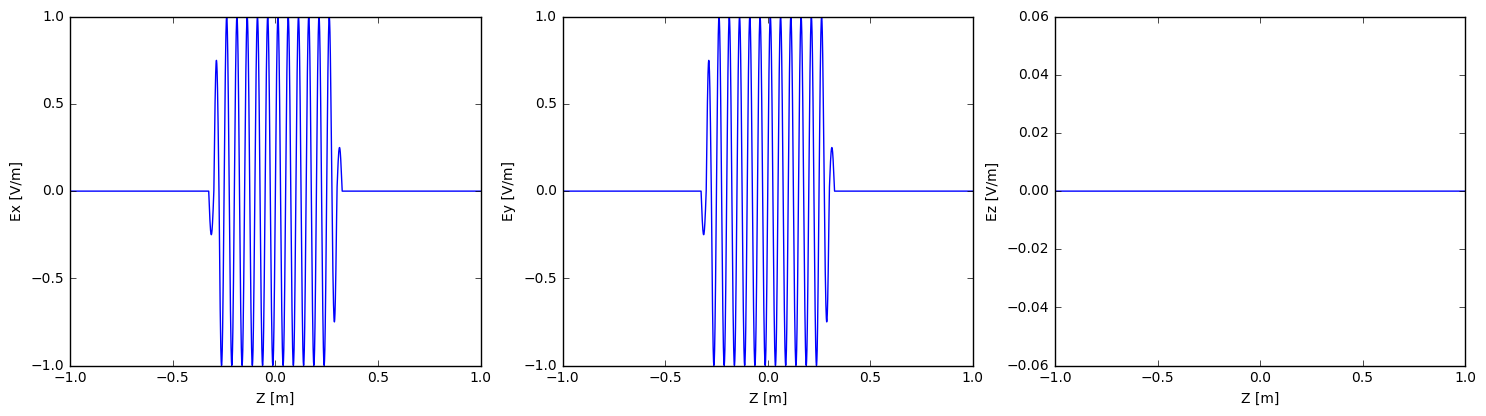

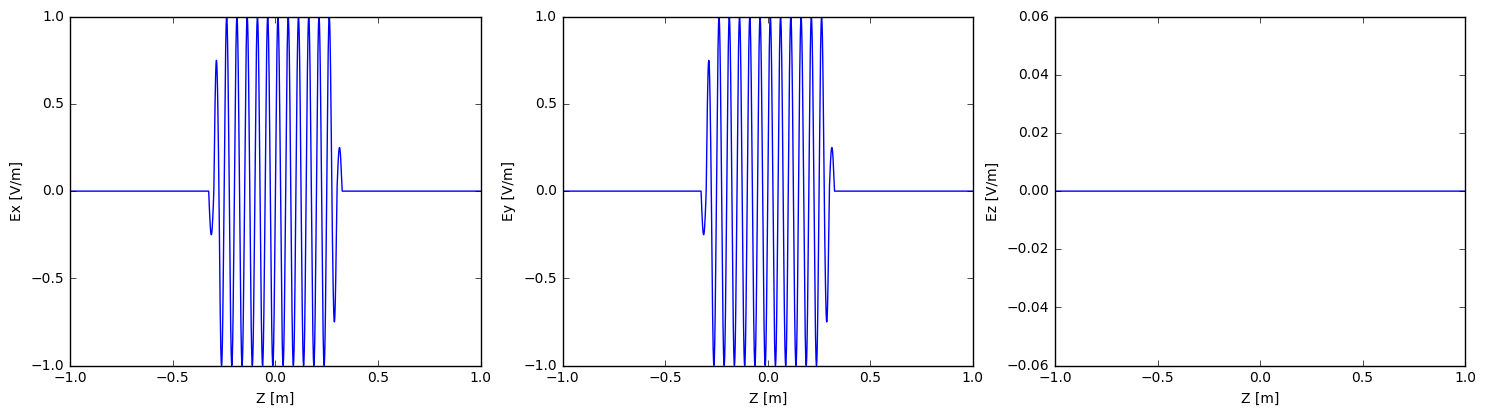

In [19]:
# OSCARS supports import and exporting an SRW format.
# It will be plotted before and after the import

# Make an undulator field
osr.clear_efields()
osr.add_efield_undulator(efield=[1, 1, 0], period=[0, 0, 0.050], nperiods=11)
plot_efield(osr)

# Now write the field to a file
osr.write_efield(ofile='AAElectricFields_SPECTRA.dat', oformat='SRW', xlim=[-1, 1], nx=2, ylim=[-1, 1], ny=2, zlim=[-1, 1], nz=5000)

# Clear fields and import the field from the file created above
osr.clear_efields()
osr.add_efield_file(ifile='AAElectricFields_SPECTRA.dat', iformat='SRW')

plot_efield(osr)

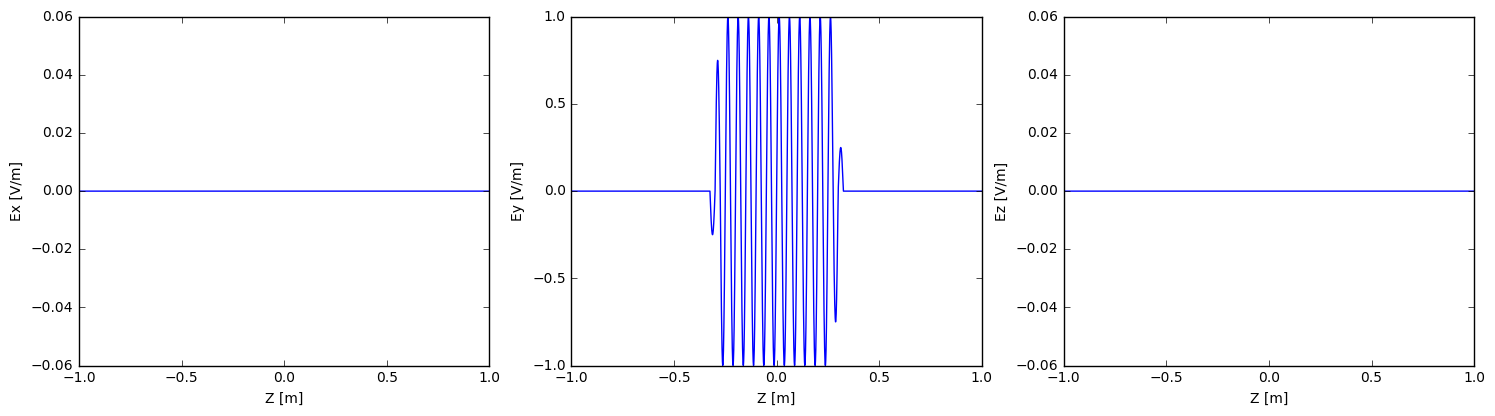

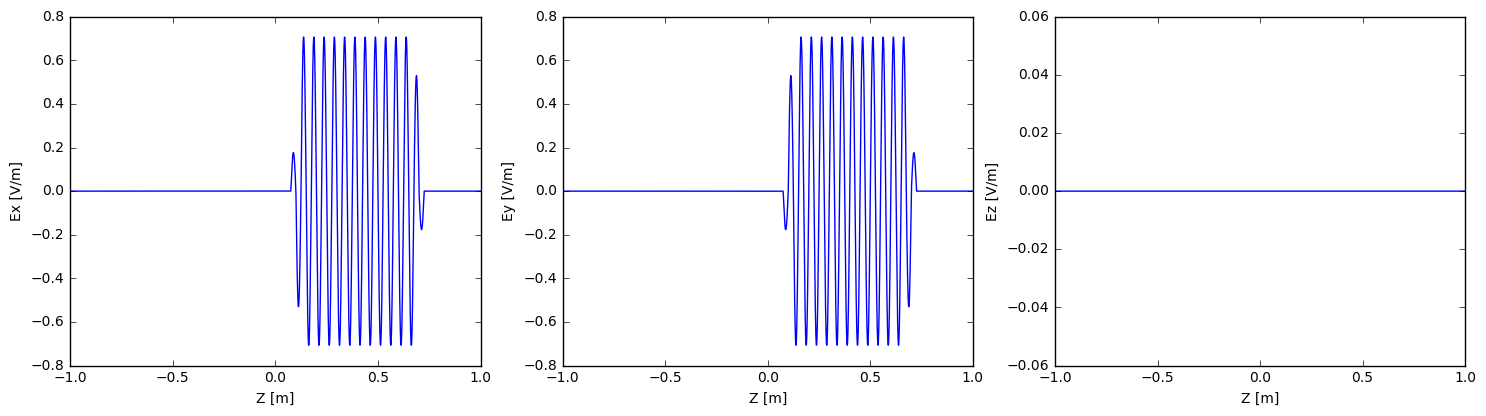

In [20]:
# One can also rotate and translate on importing a field file

# Create an undulator field
osr.clear_efields()
osr.add_efield_undulator(efield=[0, 1, 0], period=[0, 0, 0.050], nperiods=11)
plot_efield(osr)

# Now write the field to a file.  If you don't require a dimension you can leave it off
osr.write_efield(ofile='AAElectricFields_OSCARS.dat', oformat='OSCARS', zlim=[-1, 1], nz=5000)

# Clear fields and import the field from the file created above
osr.clear_efields()
osr.add_efield_file(ifile='AAElectricFields_OSCARS.dat', iformat='OSCARS', rotations=[0, 0, osr.pi()/4], translation=[0, 0, 0.4])

plot_efield(osr)

## Python Function for a Field

You can make your own python function and import it as a magnetic field.  All you need is a function which has 4 arguments: x, y, z, t.  *t* is not used at the moment but will be in future versions so it is required here for compatibility.  The function must return the BField in 3-dimensions as a list [Bx, By, Bz]

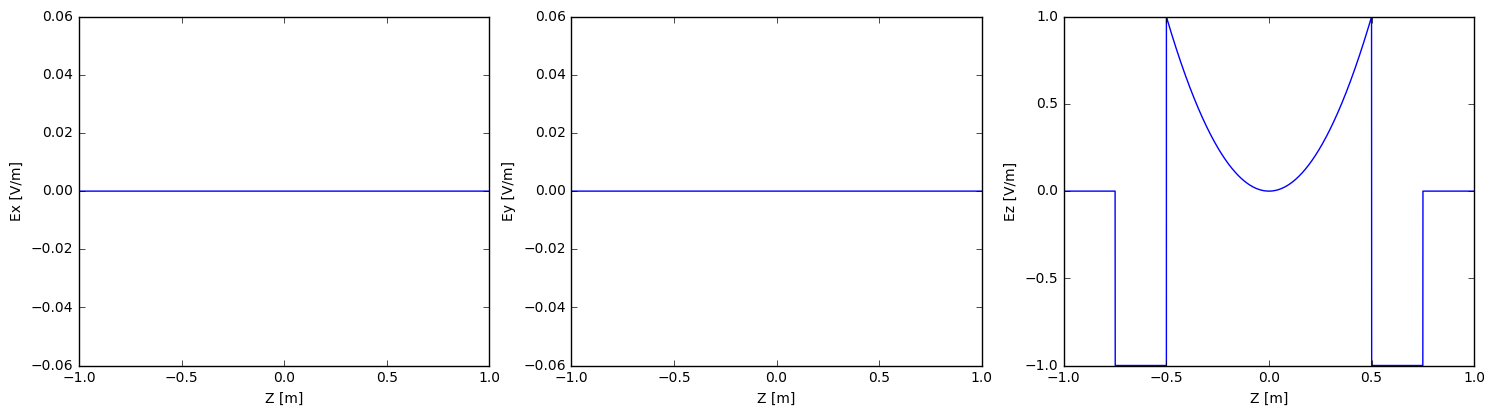

In [21]:
# Define a field function for use with OSCARS
def MyField (x, y, z, t):
    """User defined field in python function.  Must return a list: [Bx, By, Bz]"""
    
    if z >= -0.75 and z < -0.50:
        return [0, 0, -1]
    elif z >= -0.50 and z < 0.50:
        return [0, 0, 4*z*z]
    elif z >= 0.50 and z < 0.75:
        return [0, 0, -1]
    return [0, 0, 0]

# Add the field function to oscars and plot it
osr.clear_efields()
osr.add_efield_function(MyField)
plot_efield(osr, -1, 1, axis='Z')

## Combined Fields

Add as many fields as you like to OSCARS

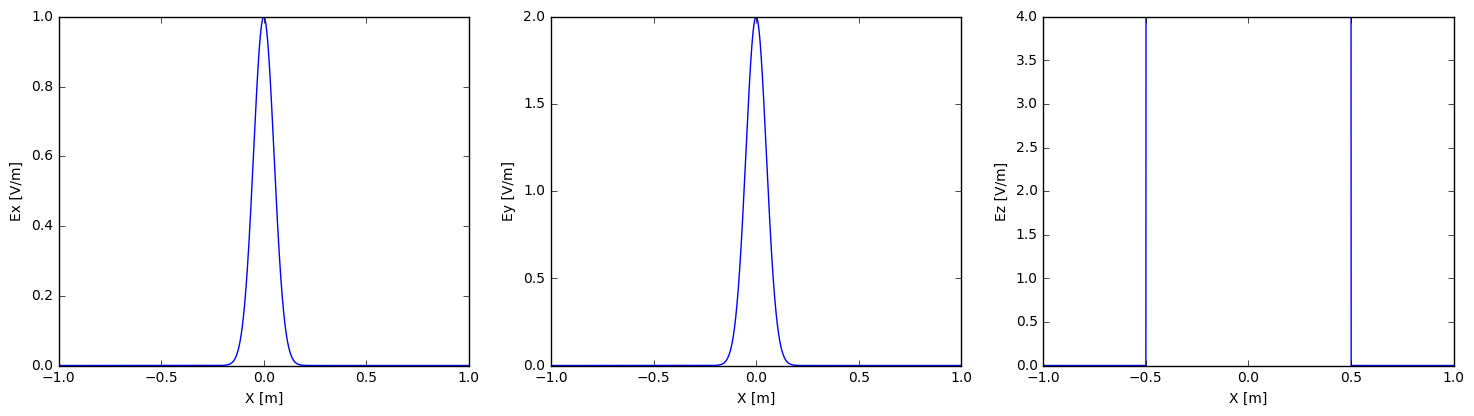

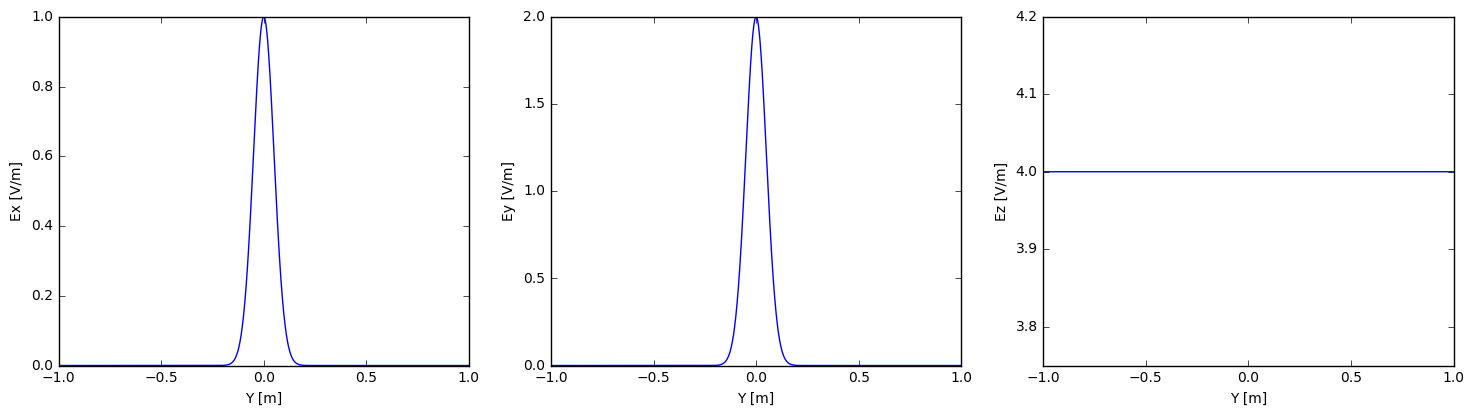

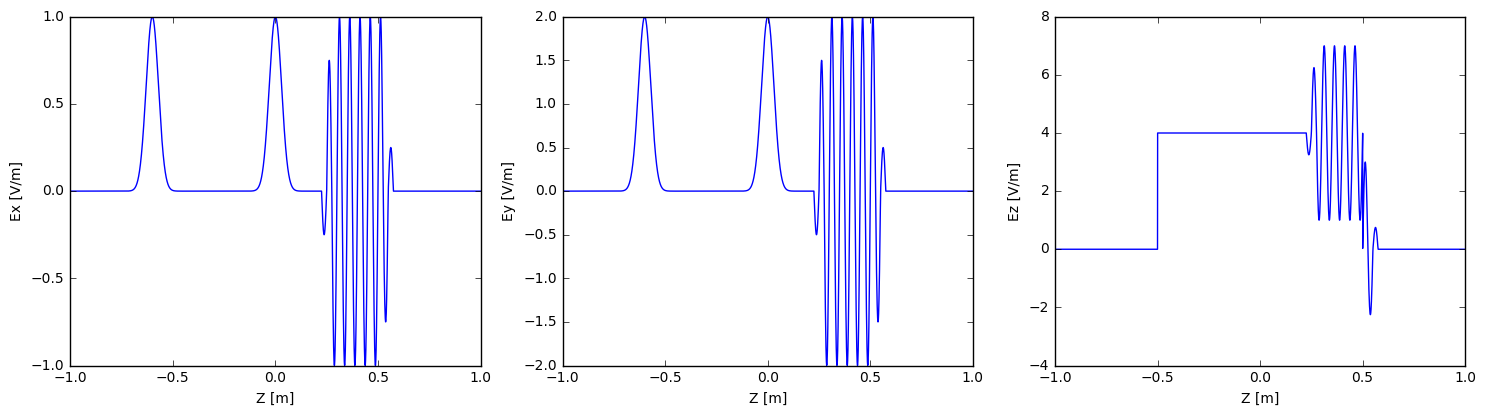

In [22]:
osr.clear_efields()
osr.add_efield_uniform(efield=[0, 0, 4], width=[1, 2, 1])
osr.add_efield_gaussian(efield=[1, 2, 0], sigma=[0.05, 0.05, 0.03])
osr.add_efield_gaussian(efield=[1, 2, 0], sigma=[0.05, 0.05, 0.03], translation=[0, 0, -0.3])
osr.add_efield_undulator(efield=[1, 2, 3], period=[0, 0, 0.050], nperiods=5, translation=[0, 0, 0.4])

# Plot the field if you like
plot_efield(osr, -1, 1, axis='X')
plot_efield(osr, -1, 1, axis='Y')
plot_efield(osr, -1, 1, axis='Z')